<a href="https://colab.research.google.com/github/Fecry/MetNumUN2024I/blob/main/Lab2/crramirezmo_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install -U fortran-magic ## Se instala fortran magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00


In [14]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 35 µs, sys: 1 µs, total: 36 µs
Wall time: 39.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.162
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.32
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:


def matmulA(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A[0])
    cols_out = len(B)
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out



**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
matmulA(a, b)

CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 20.5 µs


[[5, 8], [8, 13], [17, 28]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmulB(A, B):
    """Chekcing the mtarix multiplication compatibility condition len(A[0]) == len(B)"""
    if len(A[0]) == len(B):
      out = [[0 for col in range(len(B[0]))] for row in range(len(A))]
      for i in range(len(A)):
          for j in range(len(B[0])):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
        return ("The matrices cannot be multiplied.")

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmulB(a,b)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.2 µs


'The matrices cannot be multiplied.'

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a =[[3,4,5],
    [4,6,8],
    [70, 24, 3]]
b = [[2,4,5],
     [1,2,46],
     [4,5,7]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:


%%time
matmulB(a,b)



CPU times: user 34 µs, sys: 0 ns, total: 34 µs
Wall time: 38.1 µs


[[30, 45, 234], [46, 68, 352], [176, 343, 1475]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-2.479134811922898

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.06414192016188602, 0.8720532681850007, 0.16866050203847338],
 [0.415876309328125, 0.2959856146030069, 0.21558693581870614]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time

In [ ]:


%%time
M_1 = random_matrix(600, 100)
M_2 = random_matrix(100, 600)
result = matmul(M_1, M_2)



CPU times: user 13.1 s, sys: 35.5 ms, total: 13.1 s
Wall time: 20.6 s


In [ ]:
avg = 0
for i in range(10):
  start = time.process_time()
  result = matmul(M_1, M_2)
  end = time.process_time()
  print("{} execution: ".format(i), end - start)
  avg += (end - start)
print("The average execution time is: ", avg/10)


0 execution:  12.821511674000021
1 execution:  10.126050072999988
2 execution:  9.008939365000003
3 execution:  8.982317749000003
4 execution:  7.984911799000031
5 execution:  9.452748959000019
6 execution:  8.993478460999995
7 execution:  9.032654589000003
8 execution:  8.01448670100001
9 execution:  8.957855139999992
The average execution time is:  9.337495451000006


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
com_time_ex = {'Language': ['Pyhton'], 'Average Secs': [avg/10]}
DF_com_time_ex = pd.DataFrame(com_time_ex)
display(DF_com_time_ex)


,Language,Average Secs
0,Pyhton,9.337495


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
m1 = np.array(M_1)
m2 = np.array(M_2)
avg = 0
for i in range(10):
  start = time.process_time()
  m3 = m1@m2
  end = time.process_time()
  avg += end - start
print("The average execution time is: ", avg/10)

The average execution time is:  0.007222339300011526


In [ ]:
DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['Numpy', avg/10]
display(DF_com_time_ex)

,Language,Average Secs
0,Pyhton,9.337495
1,Numpy,0.007222


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.23 s, sys: 63.5 ms, total: 9.29 s
Wall time: 9.33 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

The extension _fortran_magic_440e59fa77b9e0e178594e0903a354e3 is already loaded. To reload it, use:
  %fortran_config --clean-cache


In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.2 ms, sys: 10 µs, total: 11.2 ms
Wall time: 12.6 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 183 µs, sys: 1 µs, total: 184 µs
Wall time: 193 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:


M1 = [[156, 22],
     [89, 156]]

M2 = [[156, 5],
     [152, 156]]



**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:


 %%fortran
subroutine fortran_matmul(C,D,E)
     double precision, dimension(:,:), intent(in) :: C
     double precision, dimension(:,:), intent(in) :: D
     double precision, dimension(2,2), intent(out) :: E

  E = matmul(C,D)

end



The extension _fortran_magic_2c253665290aed7cfeef3358a6985c49 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:


%%time
fortran_matmul(M1,M2)



CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 39.1 µs


array([[27680.,  4212.],
       [37596., 24781.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:


%%fortran
subroutine fortran_matmul(X,Y,Z)
     double precision, dimension(:,:), intent(in) :: X
     double precision, dimension(:,:), intent(in) :: Y
     double precision, dimension(600,600), intent(out) :: Z

  Z = matmul(X,Y)

end



The extension _fortran_magic_2408caa9dabc824897036e14f40bd87c is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
fortran_matmul(M_1,M_2)

CPU times: user 18.7 ms, sys: 996 µs, total: 19.7 ms
Wall time: 20.9 ms


array([[23.93723942, 23.64092503, 25.78943492, ..., 25.41534437,
        23.82116698, 25.0321595 ],
       [23.98203464, 24.01755006, 25.67466398, ..., 25.98078036,
        23.74254841, 24.03161525],
       [23.81514854, 25.59890582, 24.22876814, ..., 23.70396743,
        24.04950471, 23.34484456],
       ...,
       [21.46194194, 22.9225705 , 24.01583934, ..., 24.03931479,
        23.88299646, 22.73582318],
       [24.58422634, 24.36481782, 25.2236824 , ..., 24.37762595,
        26.00803659, 24.4409187 ],
       [21.44021781, 21.54989951, 23.4643688 , ..., 22.09020175,
        21.10570939, 21.48041619]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:


import time

avg = 0
for i in range(10):
    start = time.process_time()
    fortran_matmul(M_1, M_2)
    end = time.process_time()
    avg += end - start

avg = avg / 10
print("The average execution time is: ", avg)

DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['FortranMagic', avg]
display(DF_com_time_ex)


The average execution time is:  0.011997542000005978


,Language,Average Secs
0,Pyhton,9.337495
1,Numpy,0.007222
2,FortranMagic,0.011998


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile test.f
        program TEST

            integer :: a = 600
            integer :: b = 100
            integer :: c = 600

            real :: H,sta,fin

            integer :: l, m, n, o

            double precision, dimension(600,100) :: X
            double precision, dimension(100,600) :: Y
            double precision, dimension(600,600) :: Z

            do m = 1, a
                do n = 1, a
                   X(m, n)= m+n * 0.1
                end do
            end do

           do m = 1, b
                 do n = 1, c
                    Y(m, n)= m+n * 0.5
                 end do
           end do

           H = 0.0

           do l = 1, 10
               call cpu_time(sta)
               Z = matmul(X,Y)
              call cpu_time(fin)
               H = H + (fin-sta)
           end do
           H = H/10.0
        PRINT *, H
      stop
      end

Overwriting test.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:


!gfortran test.f -o test
!./test



   5.23809996E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:


DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['Fortran', 0.000531439949]
display(DF_com_time_ex)



,Language,Average Secs
0,Pyhton,9.337495
1,Numpy,0.007222
2,FortranMagic,0.011998
3,Fortran,0.000531


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_c.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
//------------------------------
int count=10;
FILE *archivo;

  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }

//------------------------------

  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }

//------------------------------

  int Resultado[600][600];

// Realizar la multiplicación 10 veces
    clock_t inicio,stop;
    double total=0.0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= (double) (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        printf("%f ", total);


    //escribir el dato en un archivo para poderlo ingresar al dataframe
    archivo = fopen("c_total.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);

}


Overwriting mult_c.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc mult_c.c -o mult_c
!./mult_c

0.162826 

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:


C = open("c_total.txt",'r')

avr_archivo = float(C.readline())

DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['C', avr_archivo]

display(DF_com_time_ex)


,Language,Average Secs
0,Pyhton,9.337495
1,Numpy,0.007222
2,FortranMagic,0.011998
3,Fortran,0.000531
4,C,0.162826


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_c++.cc

#include <iostream>
#include <ctime>

using namespace std;
int main() {

//------------------------------
int count=10;
FILE *archivo;

  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }

//------------------------------

  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }

//------------------------------

  int Resultado[600][600];

// Realizar la multiplicación 10 veces

    unsigned inicio,stop;
    double total=0.0;
    int repeticion =0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= double (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        cout << total << endl;

    //escribir el dato en un archivo para poderlo ingresar al dataframe
    archivo = fopen("c++_total.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);

  return 0 ;
}



Overwriting mult_c++.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:


!g++ mult_c++.cc -o mult_c++
!./mult_c++




0.16021


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
C_new = open("c++_total.txt",'r')
avr_archivo = float(C_new.readline())

DF_com_time_ex = DF_com_time_ex.append({'Language': 'C++', 'Average Secs': avr_archivo},ignore_index = True)

DF_com_time_ex


<ipython-input-195-139aa105abb9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_com_time_ex = DF_com_time_ex.append({'Language': 'C++', 'Average Secs': avr_archivo},ignore_index = True)


,Language,Average Secs
0,Pyhton,9.337495
1,Numpy,0.007222
2,FortranMagic,0.011998
3,Fortran,0.000531
4,C,0.162826
5,C++,0.160210


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile multJava.java

import java.lang.*;
import java.io.FileWriter;
import java.io.IOException;

class multJava {

  public static void main(String[] args) {

//------------------------------
int count=10;

  int [][] A = new int[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }

//------------------------------

  int [][] B = new int[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }

//------------------------------

  int [][] Resultado = new int[600][600];

// Realizar la multiplicación 10 veces

    long inicio ,stop ;
    double total=0.0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= System.currentTimeMillis();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            for(int j = 0; j < 600; j++) {
                Resultado[i][j] = 0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                }
            }
        }

        stop = System.currentTimeMillis();
        total += (stop - inicio) / 1000.0;  // Restar el tiempo de inicio antes de dividir
        }
      total= total/10;
      String formattedTotal = String.format("%.6f", total);
      total = Double.parseDouble(formattedTotal);
      System.out.println(total);

      try {
      FileWriter archivo = new FileWriter("java_total.txt");
      archivo.write(formattedTotal);
      archivo.close();}
    catch (IOException e) {
        e.printStackTrace();
    }

  return ;
  }
}

Overwriting multJava.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac multJava.java
!java multJava

0.0969


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
java = open("java_total.txt",'r')
avr_archivo = float(java.readline())
DF_com_time_ex = DF_com_time_ex.append({'Language': 'Java', 'Average Secs': avr_archivo},ignore_index = True)
DF_com_time_ex

<ipython-input-198-43e75c27234e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_com_time_ex = DF_com_time_ex.append({'Language': 'Java', 'Average Secs': avr_archivo},ignore_index = True)


,Language,Average Secs
0,Pyhton,9.337495
1,Numpy,0.007222
2,FortranMagic,0.011998
3,Fortran,0.000531
4,C,0.162826
5,C++,0.160210
6,Java,0.096900


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matJavascript.js
const { performance } = require('perf_hooks');
const fs = require("fs");

// Crear y rellenar la matriz A
var count = 10;
let A = [];
for (let i = 0; i < 600; i++) {
    A[i] = [];
    for (let j = 0; j < 100; j++) {
        A[i][j] = count + i + j;
    }
}

// Crear y rellenar la matriz B
let B = [];
for (let i = 0; i < 100; i++) {
    B[i] = [];
    for (let j = 0; j < 600; j++) {
        B[i][j] = count + i + j;
    }
}

// Guardar las matrices en un archivo
let matrices = { A, B };
fs.writeFileSync('matrices.json', JSON.stringify(matrices));

Overwriting matJavascript.js


In [ ]:
%%writefile multJavascript.js
const { performance } = require('perf_hooks');
const fs = require("fs");

// Leer las matrices desde el archivo
let matrices = JSON.parse(fs.readFileSync('matrices.json'));
let A = matrices.A;
let B = matrices.B;

let Resultado = [];

// Realizar la multiplicación 10 veces
let total = 0;
let inicio = 0;
let stop = 0;

for (let repeticion = 0; repeticion < 10; repeticion++) {
    inicio = performance.now();

    // Realizar la multiplicación de matrices
    for (let i = 0; i < 600; i++) {
        Resultado[i] = [];
        for (let j = 0; j < 600; j++) {
            Resultado[i][j] = 0;
            for (let k = 0; k < 100; k++) {
                Resultado[i][j] += A[i][k] * B[k][j];
            }
        }

    }
    stop = performance.now();
    total += (stop - inicio) / 1000;
}

total = total / 10;
total = parseFloat(total.toFixed(6));
console.log(total);
fs.writeFileSync('total.json', JSON.stringify(total));

Overwriting multJavascript.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matJavascript.js
!node multJavascript.js

0.35198


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
import json
with open("total.json", 'r') as js:
    total = float(json.load(js))

# Agregar el valor a un diccionario
DF_com_time_ex = DF_com_time_ex.append({'Language': 'Javascript', 'Average Secs': total}, ignore_index=True)

# Mostrar el DataFrame
display(DF_com_time_ex)

<ipython-input-230-71a0d3fd1c97>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_com_time_ex = DF_com_time_ex.append({'Language': 'Javascript', 'Average Secs': total}, ignore_index=True)


,Language,Average Secs
0,Pyhton,9.337495
1,Numpy,0.007222
2,FortranMagic,0.011998
3,Fortran,0.000531
4,C,0.162826
5,C++,0.160210
6,Java,0.096900
7,Javascript,0.351980


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:


min_avg=min(DF_com_time_ex["Average Secs"])
min_avg



0.000531439949

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
DF_com_time_ex["Speed Factor"] = DF_com_time_ex["Average Secs"].apply(lambda x: float(x))
min = DF_com_time_ex['Average Secs'].min()
DF_com_time_ex['Speed Factor'] = DF_com_time_ex["Average Secs"]/min
DF_com_time_ex

,Language,Average Secs,Speed Factor
0,Pyhton,9.337495,17570.179789
1,Numpy,0.007222,13.590132
2,FortranMagic,0.011998,22.575537
3,Fortran,0.000531,1.000000
4,C,0.162826,306.386451
5,C++,0.160210,301.463976
6,Java,0.096900,182.334806
7,Javascript,0.351980,662.313777


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
sort_df = DF_com_time_ex.sort_values(by=['Average Secs'])
sort_df

,Language,Average Secs,Speed Factor
3,Fortran,0.000531,1.000000
1,Numpy,0.007222,13.590132
2,FortranMagic,0.011998,22.575537
6,Java,0.096900,182.334806
5,C++,0.160210,301.463976
4,C,0.162826,306.386451
7,Javascript,0.351980,662.313777
0,Pyhton,9.337495,17570.179789


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"


In [ ]:

# We also can't grow an array once it's created.
# data.append(3)


In [ ]:

# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two



Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:


# Most real datasets are read in from an external file format.
# aapl = pd.read_csv('AAPL', parse_dates=['Date'], index_col='Date')

aapl = yf.download("AAPL", start = "2013-01-01" , end ="2013-12-01")
aapl.head()



In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [3]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52
Receiving objects: 100% (88/88), 11.87 MiB | 32.25 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [4]:
!pip install githubdl

In [5]:
!githubdl -u https://github.com/ssanderson/pydata-toolbox -d demos -g 0260ccdcf10212d2a8f1d9ff6fbc7e55b00a4ad2

2024-02-28 22:36:42,728 - root         - INFO     - Retrieving a list of files for directory: demos
2024-02-28 22:36:42,728 - root         - INFO     - repo_name: ssanderson/pydata-toolbox api_path: contents request_string: /demos
2024-02-28 22:36:42,728 - root         - INFO     - Requesting file: demos at url: https://api.github.com/repos/ssanderson/pydata-toolbox/contents/demos
2024-02-28 22:36:42,825 - root         - CRITICAL - Unable to retrieve list of files from response.
 Exception: 'str' object has no attribute 'get'
 Response: {'message': 'Bad credentials', 'documentation_url': 'https://docs.github.com/rest'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/githubdl/request_processing.py", line 21, in get_files_from_json
    files.update({item.get("name"): item.get("type")})
AttributeError: 'str' object has no attribute 'get'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/

In [6]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )


In [7]:


# from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()



<ipython-input-6-74fdf899ad9d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [8]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

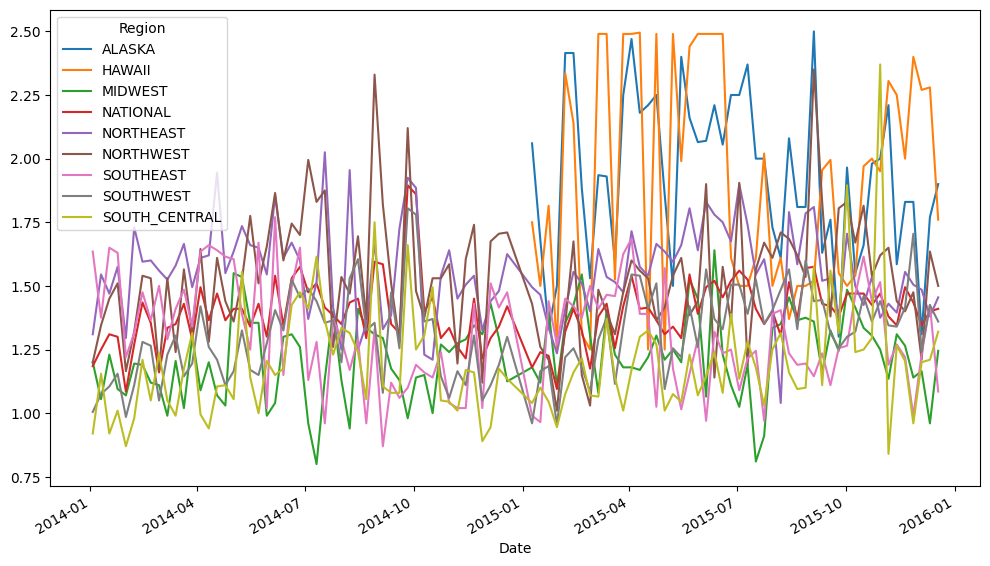

In [15]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [16]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

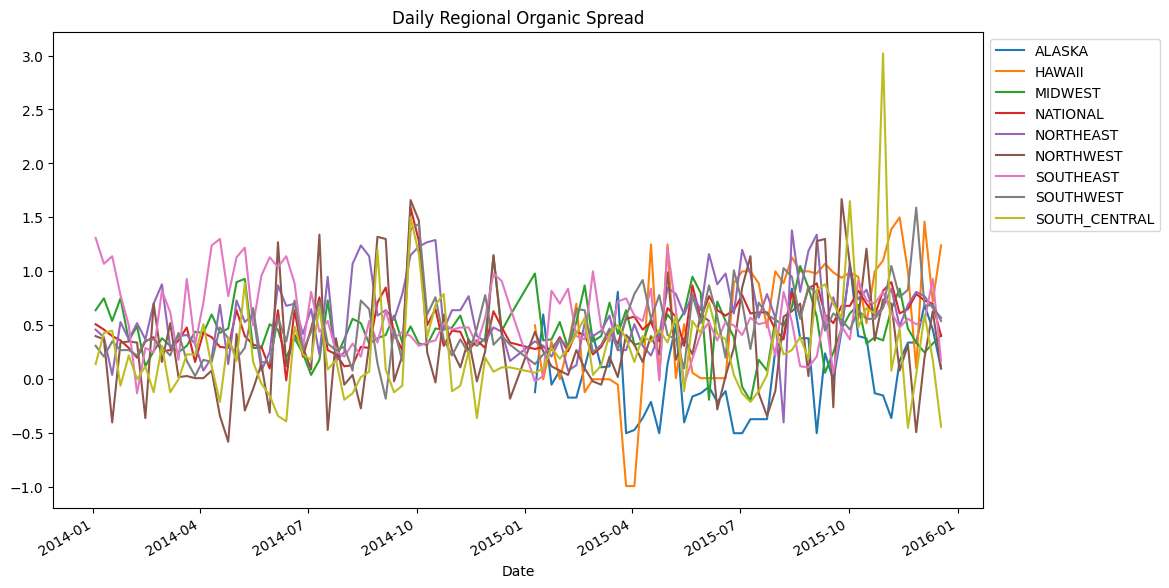

In [17]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [19]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


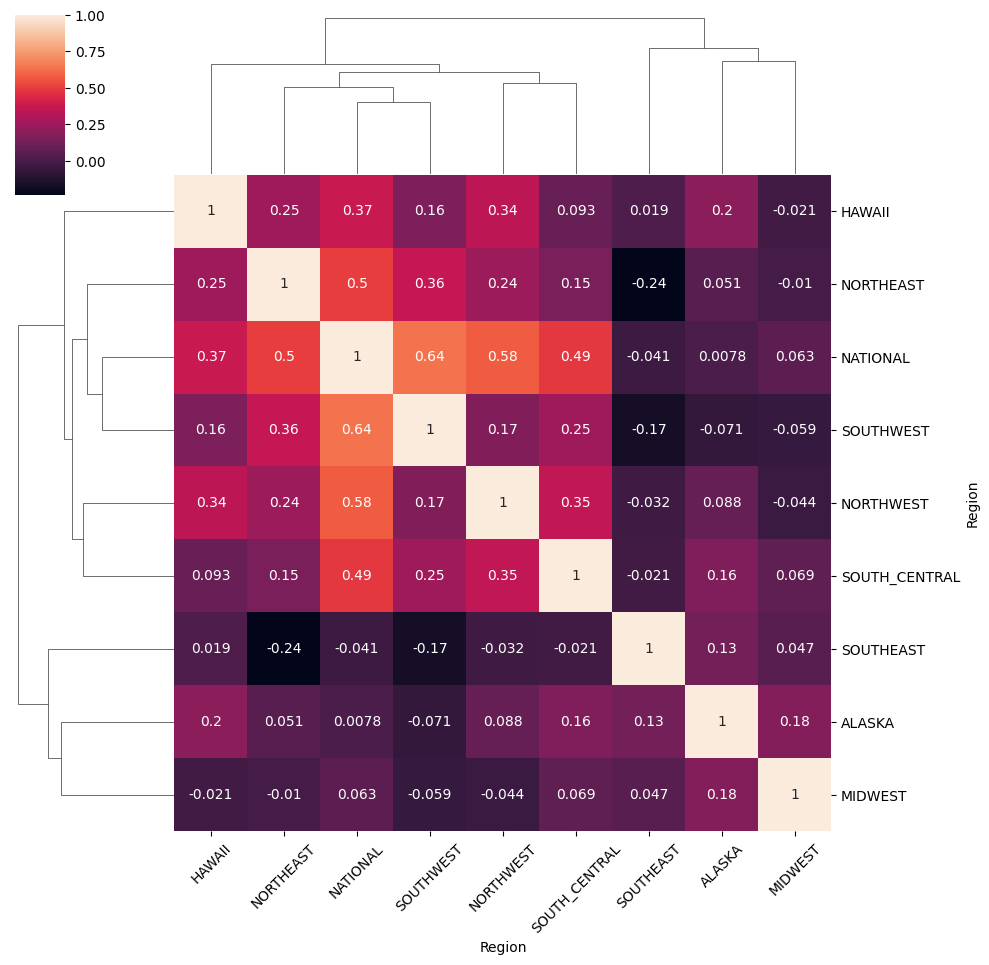

In [20]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
## Needed Libraries.
from urllib.parse import urlencode
import pandas as pd

import requests

## In this case, we will obtain TOMATOES data.
base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
query_params = {
  'class': ['FRUITS'], ## Change Fruit with Vegetables
  'commodity': ['AVOCADOS'], ## Change Avocados with Tomatoes
  'compareLy': ['No'],
  'format': ['excel'],
  'organic': ['ALL'],
  'portal': ['fv'],
  'region': ['ALL'],
  'type': ['retail'],
}

## Build URL to send request.
url = base_url + '?' + urlencode(query_params, doseq=1)

## Request data from url
resp = requests.get(url, stream=True)

## Create File with data.
with open('data.html', 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
            f.close()

## Read data from file.
avocados_data = pd.read_html('data.html', header=0)[0]
avocados_data

In [21]:

from urllib.parse import urlencode
import pandas as pd
import requests

resp = requests.get('https://www.datos.gov.co/resource/rik9-88u9.json')

data = resp.json()

tabla = pd.DataFrame(data)

tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   fecha_reporte_web      1000 non-null   object
 1   id_de_caso             1000 non-null   object
 2   fecha_de_notificaci_n  1000 non-null   object
 3   departamento           1000 non-null   object
 4   departamento_nom       1000 non-null   object
 5   ciudad_municipio       1000 non-null   object
 6   ciudad_municipio_nom   1000 non-null   object
 7   edad                   1000 non-null   object
 8   unidad_medida          1000 non-null   object
 9   sexo                   1000 non-null   object
 10  fuente_tipo_contagio   1000 non-null   object
 11  ubicacion              1000 non-null   object
 12  estado                 1000 non-null   object
 13  recuperado             1000 non-null   object
 14  fecha_inicio_sintomas  996 non-null    object
 15  fecha_diagnostico     

In [22]:
tabla.sample(200)

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_
255,2020-11-03 00:00:00,1095137,2020-10-31 00:00:00,25,CUNDINAMARCA,25754,SOACHA,36,1,F,...,Casa,Leve,Recuperado,2020-10-20 00:00:00,2020-11-03 00:00:00,2020-11-06 00:00:00,Tiempo,6,NaN,NaN
463,2020-08-05 00:00:00,338405,2020-07-28 00:00:00,25,CUNDINAMARCA,25740,SIBATE,52,1,F,...,Casa,Leve,Recuperado,2020-07-28 00:00:00,2020-08-05 00:00:00,2020-08-23 00:00:00,PCR,5,NaN,NaN
447,2020-08-05 00:00:00,338416,2020-07-28 00:00:00,25,CUNDINAMARCA,25740,SIBATE,51,1,F,...,Casa,Leve,Recuperado,2020-07-28 00:00:00,2020-08-05 00:00:00,2021-01-25 00:00:00,PCR,5,NaN,NaN
677,2020-11-30 00:00:00,1315450,2020-11-14 00:00:00,25,CUNDINAMARCA,25843,UBATE,20,1,M,...,Casa,Leve,Recuperado,2020-11-10 00:00:00,2020-11-25 00:00:00,2020-12-01 00:00:00,Tiempo,6,NaN,NaN
712,2020-10-31 00:00:00,1065385,2020-10-24 00:00:00,25,CUNDINAMARCA,25488,NILO,31,1,M,...,Casa,Leve,Recuperado,2020-10-21 00:00:00,2020-10-29 00:00:00,2020-11-07 00:00:00,Tiempo,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2020-10-19 00:00:00,965690,2020-10-05 00:00:00,25,CUNDINAMARCA,25754,SOACHA,49,1,M,...,Casa,Leve,Recuperado,2020-10-01 00:00:00,2020-10-16 00:00:00,2020-10-20 00:00:00,PCR,6,NaN,NaN
4,2020-09-23 00:00:00,781892,2020-09-11 00:00:00,25,CUNDINAMARCA,25754,SOACHA,25,1,F,...,Casa,Leve,Recuperado,2020-09-07 00:00:00,2020-09-22 00:00:00,2020-09-27 00:00:00,Tiempo,6,NaN,NaN
132,2020-09-23 00:00:00,781048,2020-09-18 00:00:00,25,CUNDINAMARCA,25754,SOACHA,1,2,F,...,Casa,Leve,Recuperado,2020-09-15 00:00:00,2020-09-22 00:00:00,2021-02-11 00:00:00,Tiempo,6,NaN,NaN
811,2020-08-09 00:00:00,385025,2020-07-26 00:00:00,25,CUNDINAMARCA,25126,CAJICA,40,1,M,...,Casa,Leve,Recuperado,2020-07-22 00:00:00,2020-08-06 00:00:00,2020-08-18 00:00:00,Tiempo,6,NaN,NaN


Diagrama de sectores con respecto al Sexo


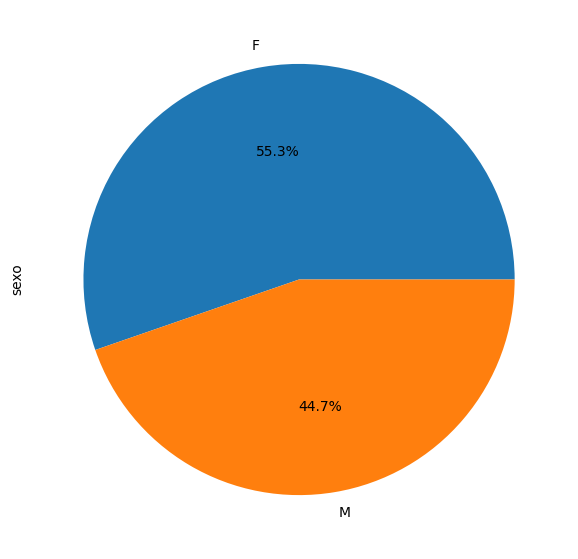

In [23]:
sexo = tabla.sexo.value_counts()
sexo.plot.pie(autopct = '%1.1f%%')
print("Diagrama de sectores con respecto al Sexo")

Diagrama de sectores de Mortalidad


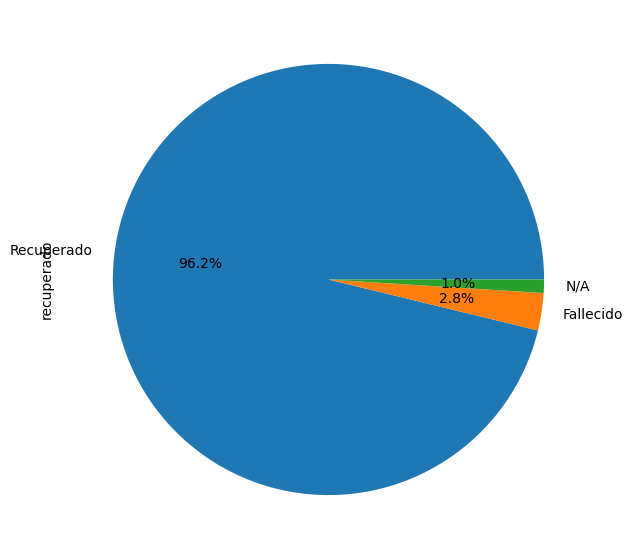

In [24]:


recuperado = tabla.recuperado.value_counts()
recuperado.plot.pie(autopct = '%1.1f%%')
print("Diagrama de sectores de Mortalidad")



Diagrama de barras de la edad 


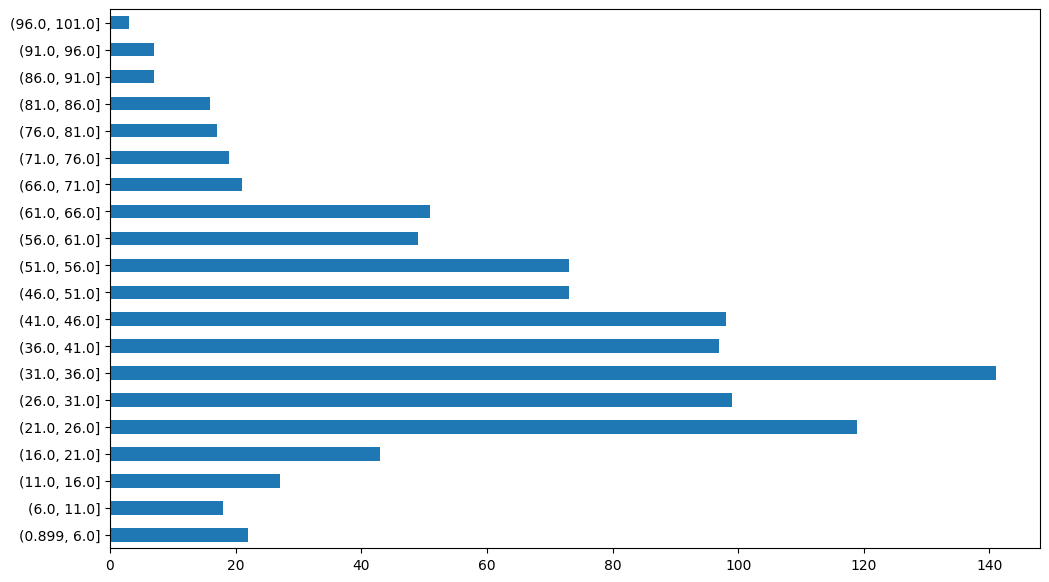

In [25]:
edad_int = pd.to_numeric(tabla.edad, downcast='integer')
edad = edad_int.value_counts(bins = 20)
edad = edad.sort_index(ascending=True)
edad.plot.barh()
print("Diagrama de barras de la edad ")

# Analysign colombian data

This database has information on the impact on the health of inhabitants of some towns in Cundinamarca between 2020 and 2021.


Font:
https://www.datos.gov.co/resource/rik9-88u9.json

In [1]:
import requests
import pandas as pd
from urllib.parse import urlencode

#Getting data from "Datos Colombia" Api and save it to a pandas dataframe
response = requests.get('https://www.datos.gov.co/resource/rik9-88u9.json')

#Changing Columns Name
data = response.json()
table = pd.DataFrame(data)

table.sample(100)

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_
339,2020-08-17 00:00:00,475406,2020-08-04 00:00:00,25,CUNDINAMARCA,25754,SOACHA,57,1,F,...,Casa,Leve,Recuperado,2020-07-31 00:00:00,2020-08-15 00:00:00,2020-08-25 00:00:00,Tiempo,6,NaN,NaN
989,2020-12-24 00:00:00,1547313,2020-12-22 00:00:00,25,CUNDINAMARCA,25269,FACATATIVA,63,1,F,...,Casa,Leve,Recuperado,2020-12-17 00:00:00,2020-12-22 00:00:00,2020-12-31 00:00:00,Tiempo,6,NaN,NaN
286,2020-12-24 00:00:00,1547270,2020-12-20 00:00:00,25,CUNDINAMARCA,25430,MADRID,56,1,F,...,Casa,Leve,Recuperado,2020-12-20 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN
630,2020-10-31 00:00:00,1065315,2020-10-27 00:00:00,25,CUNDINAMARCA,25899,ZIPAQUIRA,25,1,F,...,Casa,Leve,Recuperado,2020-10-25 00:00:00,2020-10-30 00:00:00,2020-11-11 00:00:00,Tiempo,6,NaN,NaN
507,2020-10-23 00:00:00,992867,2020-10-20 00:00:00,25,CUNDINAMARCA,25899,ZIPAQUIRA,79,1,M,...,Casa,Leve,Recuperado,2020-10-15 00:00:00,2020-10-22 00:00:00,2020-10-30 00:00:00,Tiempo,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2020-08-25 00:00:00,560149,2020-08-12 00:00:00,25,CUNDINAMARCA,25286,FUNZA,21,1,M,...,Casa,Leve,Recuperado,2020-08-08 00:00:00,2020-08-23 00:00:00,2020-09-03 00:00:00,Tiempo,6,NaN,NaN
145,2020-11-30 00:00:00,1316348,2020-11-16 00:00:00,25,CUNDINAMARCA,25307,GIRARDOT,21,1,M,...,Casa,Leve,Recuperado,2020-11-12 00:00:00,2020-11-27 00:00:00,2020-12-01 00:00:00,Tiempo,6,NaN,NaN
264,2020-12-17 00:00:00,1460824,2020-12-09 00:00:00,25,CUNDINAMARCA,25754,SOACHA,55,1,F,...,Casa,Leve,Recuperado,2020-12-05 00:00:00,2020-12-12 00:00:00,2020-12-19 00:00:00,Tiempo,6,NaN,NaN
654,2020-10-31 00:00:00,1065289,2020-10-26 00:00:00,25,CUNDINAMARCA,25154,CARMEN DE CARUPA,25,1,M,...,Casa,Leve,Recuperado,2020-10-26 00:00:00,2020-10-29 00:00:00,2020-12-31 00:00:00,PCR,6,NaN,NaN


Text(0.5, 1.0, 'Number of infected by gender.')

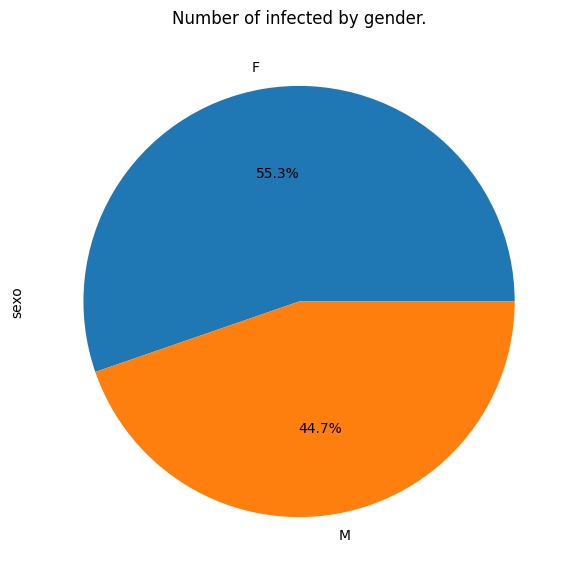

In [47]:
gender = table.sexo.value_counts()
gender.plot.pie(autopct = '%1.1f%%')
plt.title('Number of infected by gender.')

The disease impacted women more than men.

Text(0.5, 1.0, 'Sector diagram that relates mortality')

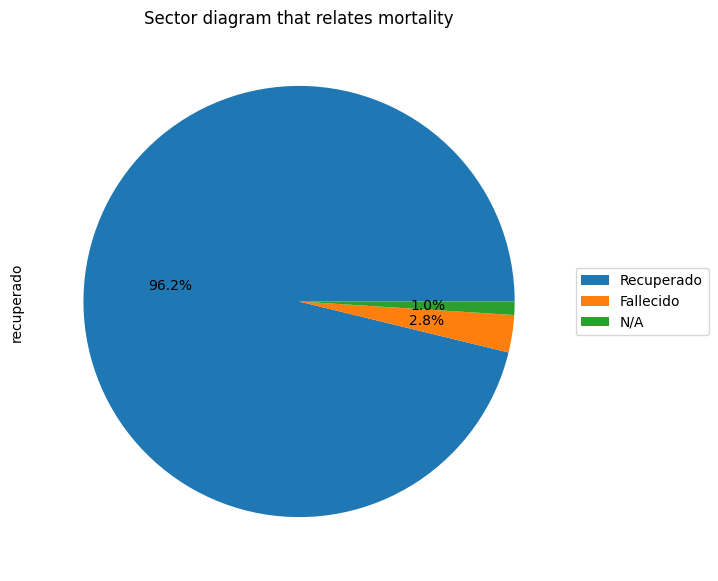

In [43]:
convalescent = table.recuperado.value_counts()
convalescent.plot.pie(autopct = '%1.1f%%', labels=None)
plt.legend(convalescent.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Sector diagram that relates mortality')

Only 2.8% of people died and most of people with the exception of unknown data, recovered well.

<Axes: title={'center': 'Number of Cases by Age'}, ylabel='Age'>

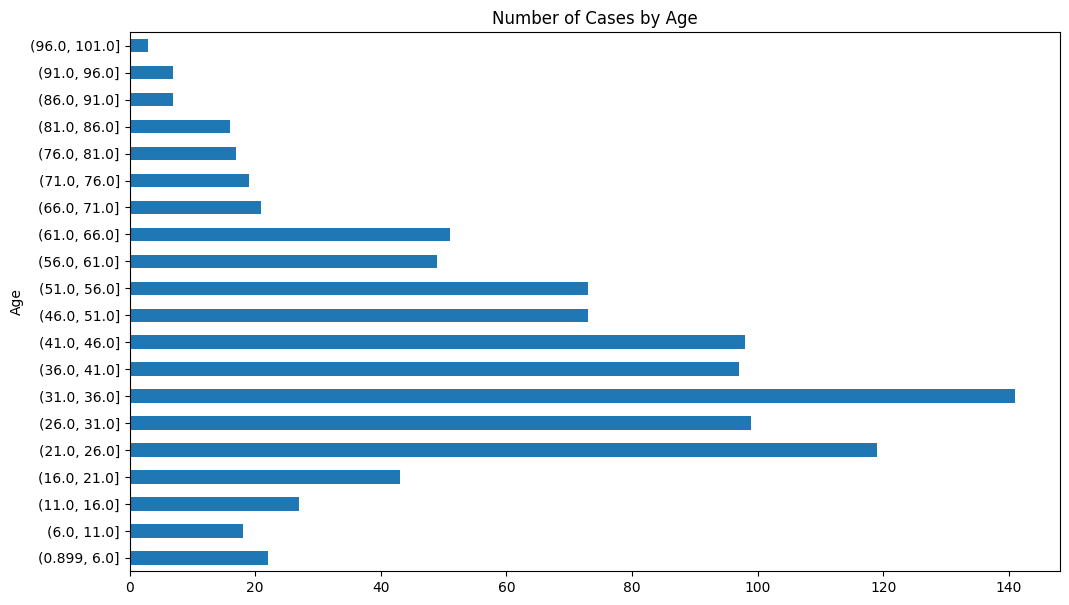

In [42]:
age = pd.to_numeric(table.edad, downcast='integer')
age = age.value_counts(bins = 20)
age = age.sort_index(ascending=True)
plt.title('Number of Cases by Age')
plt.xlabel('Number of Cases')
plt.ylabel('Age')
age.plot.barh()
#print("Bar diagrams with respect to age..")

Adults aged between 30 and 45 years were the ones with the highest registration, in which the average is between 35-40 years.

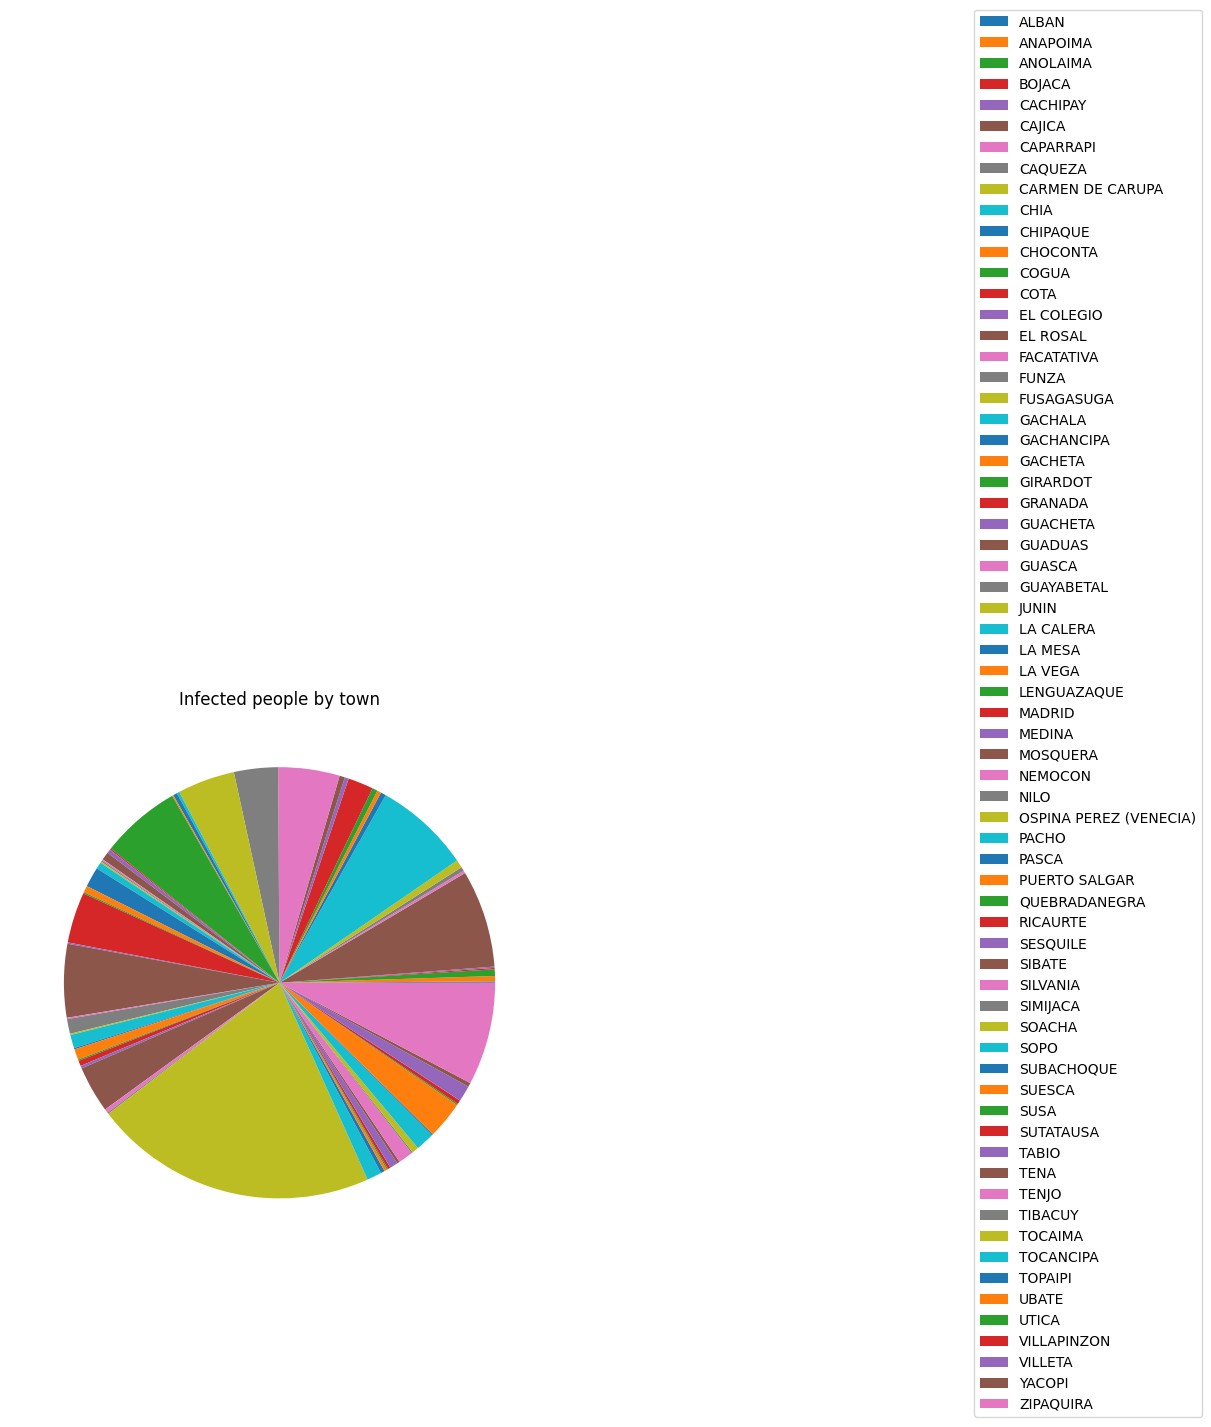

In [58]:
municipio = tabla.groupby('ciudad_municipio_nom')['unidad_medida'].count()

pie_chart = plt.pie(municipio, labels=None)

plt.legend(municipio.index, bbox_to_anchor=(2, 1), loc="center")

plt.title('Infected people by town')

plt.show()

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!